<a href="https://colab.research.google.com/github/sandeepbansode/Basic_Python_Assignments/blob/main/Capstone_Project_1_Propensity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title :Reviewing customers past and on that Predict potential customrs who can buy our service.**

# **Problem Discription**

we hav large number of customers. our salse team would liketo call potential customers who can buy our service. We don't have enough manpower and time to call reach every customer and convince them for our products. Also we need to rank customers so that we could offer them our product and services with discounted price. 

# **You are given following information**


* InvoiceNo	
* StockCode	
* Description	
* Quantity	
* InvoiceDate	
* UnitPrice	
* CustomerID	
* Country

# **Work Flow**

* Customer segmentation.
* Find Potential Vs Non Potential Customers.
* Who Can Buy Our Services In Current Month. Prediction (Predicted Sales For Future).

* Customer Lifetime Value (cltv) --Live vs Dead Customers.--Recency , Frequency , Monetary Analysis.

* Cohort Analysis.

* Lifetime Pacakage -- 

  



# **1.Lets Invite Some Libraries.**

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd 

In [2]:
#Lets inport data

data = pd.read_excel('/content/drive/MyDrive/Data Science Files/Copy of Online Retail.xlsx')

# 2. Reviewing Our Data

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#checking info of our dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#there are 541909 rows and 8 columns in our dataset
data.shape


(541909, 8)

In [7]:
# Names Of columns in our dataset
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
#most of order are in year 2011
data.InvoiceDate.value_counts()


2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-09-28 09:57:00       1
2011-09-28 09:45:00       1
2011-03-16 12:13:00       1
2011-03-16 12:22:00       1
2011-03-16 15:58:00       1
Name: InvoiceDate, Length: 23260, dtype: int64

In [9]:
#there are unique 4372 customers from we get order 
data.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

# 3. Dealing with negative values in Quantity column in Dataset

In [10]:
#there are some values in Quantity are in negative
data.Quantity.value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [11]:
#Dealing with negative values in Quantity
data['Quantity'] = data['Quantity'].abs()

data.sort_values('Quantity')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
270954,560601,22138,BAKING SET 9 PIECE RETROSPOT,1,2011-07-19 17:17:00,4.95,16764.0,United Kingdom
148468,549240,48138,DOORMAT UNION FLAG,1,2011-04-07 11:37:00,7.95,15910.0,United Kingdom
148469,549240,23154,SET OF 4 JAM JAR MAGNETS,1,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148470,549240,23156,SET OF 5 MINI GROCERY MAGNETS,1,2011-04-07 11:37:00,2.08,15910.0,United Kingdom
148472,549240,21199,PINK HEART CONFETTI IN TUBE,1,2011-04-07 11:37:00,1.65,15910.0,United Kingdom
...,...,...,...,...,...,...,...,...
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


# 4. Checking for null values

In [12]:
#there are null values in Description and CustomerID column
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
#checking the % of null values in our dataset
missing_values = pd.DataFrame()
missing_values['column'] = data.columns

missing_values['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]


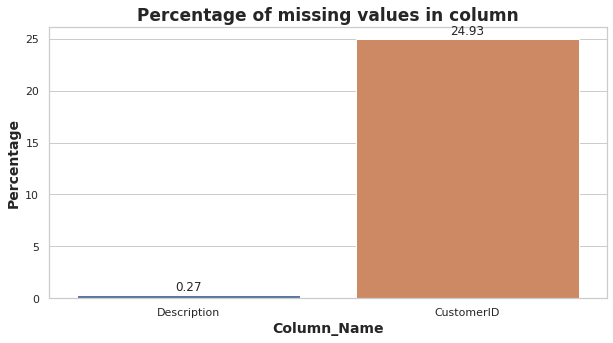

In [14]:
plt.figure(figsize=(10, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()

Description column and CustomerID contains 0.27 and 24.93% null values. But Description this column is not useful for our analysis.and with out CustomerID we can not identify customer and can not offer anything Hence we will neglect these null values.

# Heat map for missing values

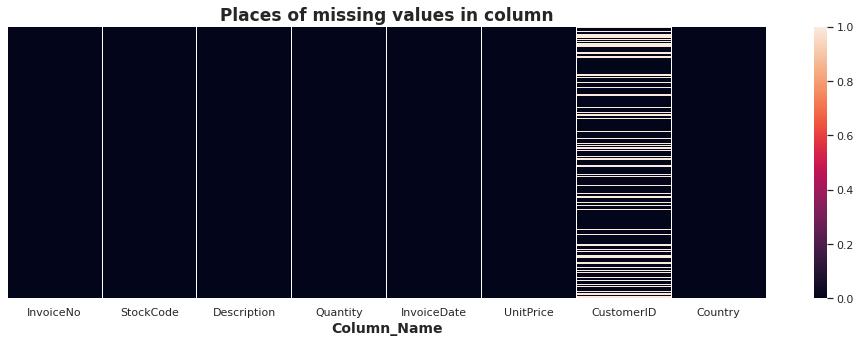

In [15]:
plt.figure(figsize=(17, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

we can see the only null values in CustomerID are noticiable. but we have to drop that.

In [16]:
#we will Drop null values
data.dropna(inplace = True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# **Unique Values In Each Feature Coulmn**

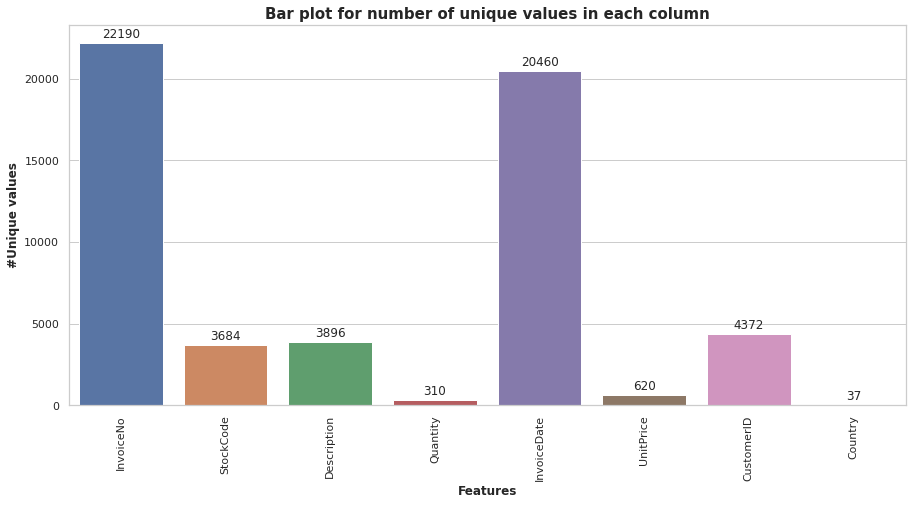

In [17]:
unique_df = pd.DataFrame()
unique_df['Features'] = data.columns
unique=[]
for i in data.columns:
    unique.append(data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

# Going deeper in Data

In [18]:
#Checking range of unit price

#data.sort_values('UnitePrice', ascending=False , inplace = True )
data.sort_values("UnitPrice", axis = 0, ascending = False,
                 inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
173277,C551685,POST,POSTAGE,1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom
173391,C551699,M,Manual,1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom
268027,C560372,M,Manual,1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom
...,...,...,...,...,...,...,...,...
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00,16560.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00,13081.0,United Kingdom
454463,575579,22437,SET OF 9 BLACK SKULL BALLOONS,20,2011-11-10 11:49:00,0.00,13081.0,United Kingdom
187613,553000,47566,PARTY BUNTING,4,2011-05-12 15:21:00,0.00,17667.0,United Kingdom


In [19]:
data.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
...,...,...,...,...,...,...,...,...
233061,557426,21625,VINTAGE UNION JACK APRON,1,2011-06-20 12:06:00,6.95,15016.0,United Kingdom
233060,557426,21364,PEACE SMALL WOOD LETTERS,1,2011-06-20 12:06:00,6.75,15016.0,United Kingdom
456017,575661,22573,STAR WOODEN CHRISTMAS DECORATION,1,2011-11-10 14:39:00,0.85,12617.0,France
456016,575661,23333,IVORY WICKER HEART MEDIUM,1,2011-11-10 14:39:00,1.25,12617.0,France


we can see there are some quantity showing unite price zero. unit price must not be zero so we add some minimul amount so we can consider them

In [20]:
df = data

In [21]:
df.sort_values("Quantity", axis = 0, ascending = False,inplace = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
...,...,...,...,...,...,...,...,...
233061,557426,21625,VINTAGE UNION JACK APRON,1,2011-06-20 12:06:00,6.95,15016.0,United Kingdom
233060,557426,21364,PEACE SMALL WOOD LETTERS,1,2011-06-20 12:06:00,6.75,15016.0,United Kingdom
456017,575661,22573,STAR WOODEN CHRISTMAS DECORATION,1,2011-11-10 14:39:00,0.85,12617.0,France
456016,575661,23333,IVORY WICKER HEART MEDIUM,1,2011-11-10 14:39:00,1.25,12617.0,France


In [22]:
col = data['UnitPrice']
col.replace(to_replace = 0.00, value = 0.1, inplace=True)

# we will find total puchase made by each customer

adding new coloumn in datase as total purchase amount

In [23]:
TotalPurchaseAmount = df.Quantity * df.UnitPrice

df["Total_Revenue_Generated"] = TotalPurchaseAmount

display(df.sort_values("Total_Revenue_Generated", ascending = False))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.080,16446.0,United Kingdom,168469.600
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:27:00,2.080,16446.0,United Kingdom,168469.600
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.040,12346.0,United Kingdom,77183.600
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:17:00,1.040,12346.0,United Kingdom,77183.600
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.500,15098.0,United Kingdom,38970.000
...,...,...,...,...,...,...,...,...,...
500313,578757,16216,LETTER SHAPE PENCIL SHARPENER,1,2011-11-25 11:41:00,0.060,12748.0,United Kingdom,0.060
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618.0,United Kingdom,0.001


# we will see the repation of customer

In [24]:
repeated_customers = df.CustomerID.value_counts()

In [25]:
#see top 10 most repeated customers
repeated_customers.head(10)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64

In [26]:
 df1 = df.groupby(['CustomerID' ]) ['Total_Revenue_Generated'].aggregate('count').reset_index().sort_values('Total_Revenue_Generated' , ascending = False)



In [27]:
display(df1)

,CustomerID,Total_Revenue_Generated
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
...,...,...
1318,14119.0,1
1046,13747.0,1
2400,15590.0,1
2379,15562.0,1


'(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=np.mean, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, \nsaturation=0.75, errcolor=".26", errwidth=None, capsize=None, dodge=True, ax=None, **kwargs) -> Any'

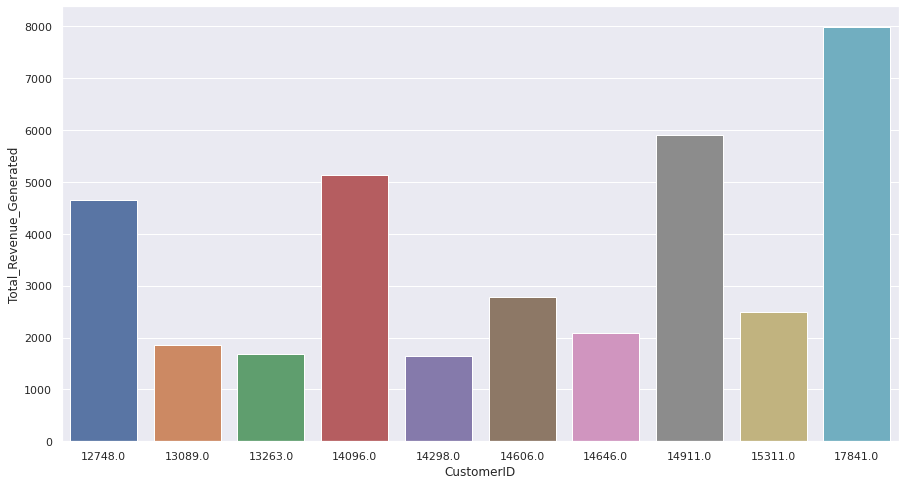

In [28]:
sns.set_style('darkgrid')
#sns.set(rc={'axes.facecolor':'ivory', 'figure.facecolor':'ivory'})
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'CustomerID' , y = 'Total_Revenue_Generated' , data = df1.head(10) , ax=ax)

'''(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=np.mean, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, 
saturation=0.75, errcolor=".26", errwidth=None, capsize=None, dodge=True, ax=None, **kwargs) -> Any'''

# **Revenue Generated From Different Countries**

we can see that most of our revenue generated from uk so we can focus on uk based customers. let see how much customers we have in uk. 





In [29]:
df1 = df.groupby(['Country'],)['Total_Revenue_Generated'].aggregate('count').reset_index().sort_values('Total_Revenue_Generated', ascending=False)

In [30]:
df1.head()

,Country,Total_Revenue_Generated
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


In [31]:
df1.sort_values('Total_Revenue_Generated' , inplace = True , ascending = False)

In [32]:
df2 = df1.head(5) 

In [33]:
df2

,Country,Total_Revenue_Generated
35,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
30,Spain,2533


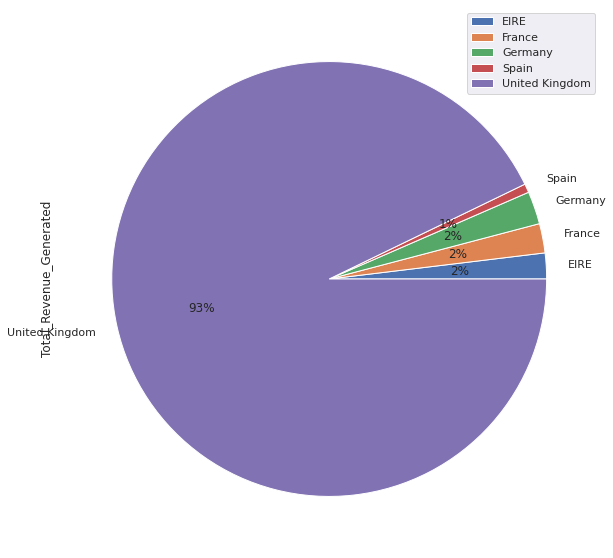

In [34]:
# Plotting the pie chart for above dataframe

fig, ax = plt.subplots(figsize=(15,10))
df2.groupby(['Country']).sum().head().plot(kind='pie', y='Total_Revenue_Generated', autopct='%1.0f%%' , ax=ax)

As we see we get nearly 93%. here we showing top 5 counties ony if we consider all on an average we get 89% of revenue from United Kingdom. So we can use to we can give our more attention towords the united kindoms customers and also build plan to grow in different countries.  

# **Lets see how much orders we got in every month in total span**

In [35]:
#let see our order range
# we have orders from 1st of dec 2010 to 9th dec. 2011
df['InvoiceDate'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]>

In [37]:
#removing hrs:second from date
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%d/%m/%Y')



In [38]:
#changing into datetimeforat
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [39]:
df.dtypes

InvoiceNo                          object
StockCode                          object
Description                        object
Quantity                            int64
InvoiceDate                datetime64[ns]
UnitPrice                         float64
CustomerID                        float64
Country                            object
Total_Revenue_Generated           float64
dtype: object

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34


In [41]:
df['InvoiceNo'].groupby([df.InvoiceDate.dt.year]).agg('count')

InvoiceDate
2010     26850
2011    379979
Name: InvoiceNo, dtype: int64

In [42]:
df['InvoiceNo'].groupby([df.InvoiceDate.dt.year, df.InvoiceDate.dt.month ]).agg('count')

InvoiceDate  InvoiceDate
2010         1               1968
             2               2044
             3               1117
             5               2724
             6               1974
             7               1133
             8               2021
             9               1822
             10              1449
             12             10598
2011         1              25848
             2              23151
             3              28057
             4              27871
             5              30499
             6              33480
             7              33090
             8              30308
             9              38612
             10             43839
             11             55749
             12              9475
Name: InvoiceNo, dtype: int64

In [43]:
#counting the orders on every every month
df.groupby(['InvoiceDate'],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

,InvoiceDate,InvoiceNo
304,2011-12-10,1596
303,2011-12-09,1507
302,2011-12-08,707
301,2011-12-07,763
300,2011-12-06,1073
...,...,...
4,2010-06-12,1974
3,2010-05-12,2724
2,2010-03-12,1117
1,2010-02-12,2044


In [44]:
#counting the orders on every every month
df1 = df.groupby([df.InvoiceDate.dt.month],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

In [45]:
#changing the name of columns
df1.rename(columns = {'InvoiceDate':'Month' , "InvoiceNo" : "Number_Of_Orders"}, inplace = True)
df1.head()

,Month,Number_Of_Orders
11,12,20073
10,11,55749
9,10,45288
8,9,40434
7,8,32329


In [46]:
df1.dtypes

Month               int64
Number_Of_Orders    int64
dtype: object

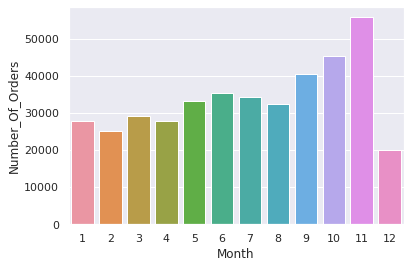

In [47]:
#ploting the bar plot monts vs Number_of_Orders
sns.barplot(x = 'Month', y = "Number_Of_Orders" , data = df1)

In [48]:
#counting the orders on every day
df.groupby(['InvoiceDate'],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

,InvoiceDate,InvoiceNo
304,2011-12-10,1596
303,2011-12-09,1507
302,2011-12-08,707
301,2011-12-07,763
300,2011-12-06,1073
...,...,...
4,2010-06-12,1974
3,2010-05-12,2724
2,2010-03-12,1117
1,2010-02-12,2044


In [49]:
# yearly count of orders
df.groupby(df.InvoiceDate.dt.year)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending = False)

,InvoiceDate,InvoiceNo
1,2011,379979
0,2010,26850


In [50]:
df.groupby( df.InvoiceDate.dt.month)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending = False)

,InvoiceDate,InvoiceNo
11,12,20073
10,11,55749
9,10,45288
8,9,40434
7,8,32329
6,7,34223
5,6,35454
4,5,33223
3,4,27871
2,3,29174


In [51]:
df1 = data

In [52]:
df1['ConvertedDate'] = data['InvoiceDate'].dt.strftime('%m/%d/%Y')

In [53]:
#counting the orders on every day
df1.groupby(['InvoiceDate'],)['InvoiceNo'].aggregate('count').reset_index().sort_values('InvoiceDate', ascending=False)

,InvoiceDate,InvoiceNo
304,2011-12-10,1596
303,2011-12-09,1507
302,2011-12-08,707
301,2011-12-07,763
300,2011-12-06,1073
...,...,...
4,2010-06-12,1974
3,2010-05-12,2724
2,2010-03-12,1117
1,2010-02-12,2044


In [54]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,ConvertedDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,01/12/2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,01/12/2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010


In [55]:
df1.dtypes

InvoiceNo                          object
StockCode                          object
Description                        object
Quantity                            int64
InvoiceDate                datetime64[ns]
UnitPrice                         float64
CustomerID                        float64
Country                            object
Total_Revenue_Generated           float64
ConvertedDate                      object
dtype: object

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,ConvertedDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,01/12/2010
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,01/12/2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010


# **What is RFM analysis?**

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.


# Recency:  How recently has the customer made a transaction with us
# Frequency: How frequent is the customer in ordering/buying some product from us
# Monetary: How much does the customer spend on purchasing products from us.

In [57]:
df1.InvoiceDate.max()

Timestamp('2011-12-10 00:00:00')

So for recency we will take 2011–12–10 as our reference date.

In [58]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [59]:
#Find the last order date in our data:
df1.InvoiceDate.max()
#So for recency we will take 2011–12–10 as our reference date.
import datetime as dt
NOW = dt.datetime(2011,12,10)

‘Now’ is a date type object; so for data processing, we will convert the InvoiceDate column into pandas date object. Next we groupby CustomerID and aggregate using lambda functions.

In [60]:
rfmTable=df1.groupby('CustomerID').agg({'InvoiceDate':lambda x:(NOW-x.max()).days,'InvoiceNo':lambda x:len(x),'Total_Revenue_Generated':lambda x: x.sum()})
rfmTable.head()

,InvoiceDate,InvoiceNo,Total_Revenue_Generated
CustomerID,,,
12346.0,326,2,154367.20
12347.0,40,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [61]:
# changinf columns names InvoiceDate To Recency, InvoiceNo TO Frequency, Total_Revenue_Generated TO monetary_value  
rfmTable.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_Revenue_Generated':'monetary_value'},inplace=True)
rfmTable.head()

,Recency,Frequency,monetary_value
CustomerID,,,
12346.0,326,2,154367.20
12347.0,40,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [62]:
#lets put these customers into bins. We will categorize each customers into quartiles — [0.25,0.5,0,75]. So 0.25 is 25th percentile, 0.5 is 50th percentile and so on.
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 102.0},
 'Recency': {0.25: 20.0, 0.5: 57.0, 0.75: 152.0},
 'monetary_value': {0.25: 308.85,
  0.5: 678.4100000000001,
  0.75: 1696.2849999999999}}

In [63]:
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['F_rank'] = df['InvoiceNo'].rank(ascending=True)
df['M_rank'] = df['InvoiceNo'].rank(ascending=True)
 
# normalizing the rank of the customers
df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)

 
df['R_rank'] = df['CustomerID'].rank(ascending=False)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,ConvertedDate,R_rank,F_rank,M_rank,R_rank_norm
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,01/12/2010,23573.5,NaN,NaN,5.794456
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010,23573.5,NaN,NaN,5.794456
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,01/12/2010,23573.5,NaN,NaN,5.794456
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010,23573.5,NaN,NaN,5.794456
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,01/12/2010,23573.5,NaN,NaN,5.794456


# Calculating Monetary Value
Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [85]:
df['Total'] = df['CustomerID']*df['Quantity']
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,"12,346","1,832,516,780"
1,"12,347","30,348,926"
2,"12,348","28,906,668"
3,"12,349","7,792,219"
4,"12,350","2,432,950"


# **Calculating Recency**
Here we are calculating recency for customers who had made a purchase with a company.

In [73]:
df_recency = df.groupby('CustomerID',
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'InvoiceDate']
recent_date = df_recency['InvoiceDate'].max()
df_recency['Recency'] = df_recency['InvoiceDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,InvoiceDate,Recency
0,"12,346",2011-01-18,326
1,"12,347",2011-10-31,40
2,"12,348",2011-09-25,76
3,"12,349",2011-11-21,19
4,"12,350",2011-02-02,311


# **Calculating Frequency**
We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company.

In [78]:

frequency_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,"12,346",2
1,"12,347",182
2,"12,348",31
3,"12,349",73
4,"12,350",17


# **Merging all three columns in one dataframe**
Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.


# Here we are mering all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.

In [88]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns=['InvoiceDate'])
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,"12,346",326,2,"1,832,516,780"
1,"12,347",40,182,"30,348,926"
2,"12,348",76,31,"28,906,668"
3,"12,349",19,73,"7,792,219"
4,"12,350",311,17,"2,432,950"


# Ranking Customer’s based upon their recency, frequency, and monetary score
# Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [89]:

rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,"12,346",326,2,"1,832,516,780",4,2,2
1,"12,347",40,182,"30,348,926",60,88,88
2,"12,348",76,31,"28,906,668",42,42,42
3,"12,349",19,73,"7,792,219",77,67,67
4,"12,350",311,17,"2,432,950",5,25,25


# **Calculating RFM score**
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [90]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(10)

,CustomerID,RFM_Score
0,"12,346",0
1,"12,347",4
2,"12,348",2
3,"12,349",3
4,"12,350",1
5,"12,352",3
6,"12,353",0
7,"12,354",3
8,"12,355",1
9,"12,356",3


 # **Rating Customer based upon the RFM score**
* rfm score >4.5 : Top Customer
* 4.5 > rfm score > 4 : High Value Customer
* 4>rfm score >3 : Medium value customer
* 3>rfm score>1.6 : Low-value customer
* rfm score<1.6 :Lost Customer

In [94]:
#Rating customers on their rfm score
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",

                            (np.where(rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                      
                            (np.where(rfm_df['RFM_Score'] > 3,
                                        "Medium Value Customer",
                                      
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))


rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(10)

,CustomerID,RFM_Score,Customer_segment
0,"12,346",0,Lost Customers
1,"12,347",4,High value Customer
2,"12,348",2,Low Value Customers
3,"12,349",3,Medium Value Customer
4,"12,350",1,Lost Customers
5,"12,352",3,Medium Value Customer
6,"12,353",0,Lost Customers
7,"12,354",3,Low Value Customers
8,"12,355",1,Lost Customers
9,"12,356",3,Medium Value Customer


# **Visualizing the customer segments**
Here we will use a pie plot to display all segments of customers.

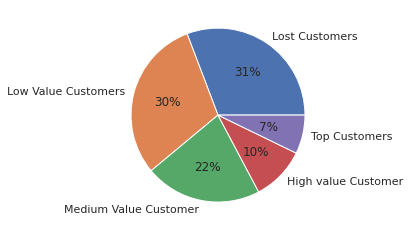

In [92]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [93]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated,ConvertedDate,R_rank,F_rank,M_rank,R_rank_norm,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,3,"17,850",United Kingdom,15,01/12/2010,"23,574",NaN,NaN,6,"107,100"
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3,"17,850",United Kingdom,20,01/12/2010,"23,574",NaN,NaN,6,"107,100"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,3,"17,850",United Kingdom,22,01/12/2010,"23,574",NaN,NaN,6,"142,800"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3,"17,850",United Kingdom,20,01/12/2010,"23,574",NaN,NaN,6,"107,100"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3,"17,850",United Kingdom,20,01/12/2010,"23,574",NaN,NaN,6,"107,100"


# **Customer Lifetime Value**

**What keeps a customer coming back?**

Customers are gained and lost over the lifetime of any company, but a truly great product or service can keep customers well fed, yet still hungry for more—figuratively speaking. This appetite for more is what continuously adds value to the company over the span of their relationship with customers.

# What is Customer Lifetime Value?
Customer lifetime value (CLV), sometimes referred to as lifetime value (LTV), is the profit margin a company expects to earn over the entirety of their business relationship with the average customer.

The customer lifetime value must account for customer acquisition costs (CAC), ongoing sales and marketing expenses, operating expenses, and, of course, the cost required to manufacture the product and services the company is selling.  

Many companies take a short-sighted approach by overlooking this valuable metric and instead optimize for a single sale in the near term. It’s still important to find new customers for the growth of the company, but optimizing the lifetime value of existing customers is also essential for a company to sustain a viable business model. 

In fact, an increase in customer retention rates by only 5% has been found to increase profits anywhere from 25% to 95%.1 With this in mind, increasing the expected customer lifetime value is essential.

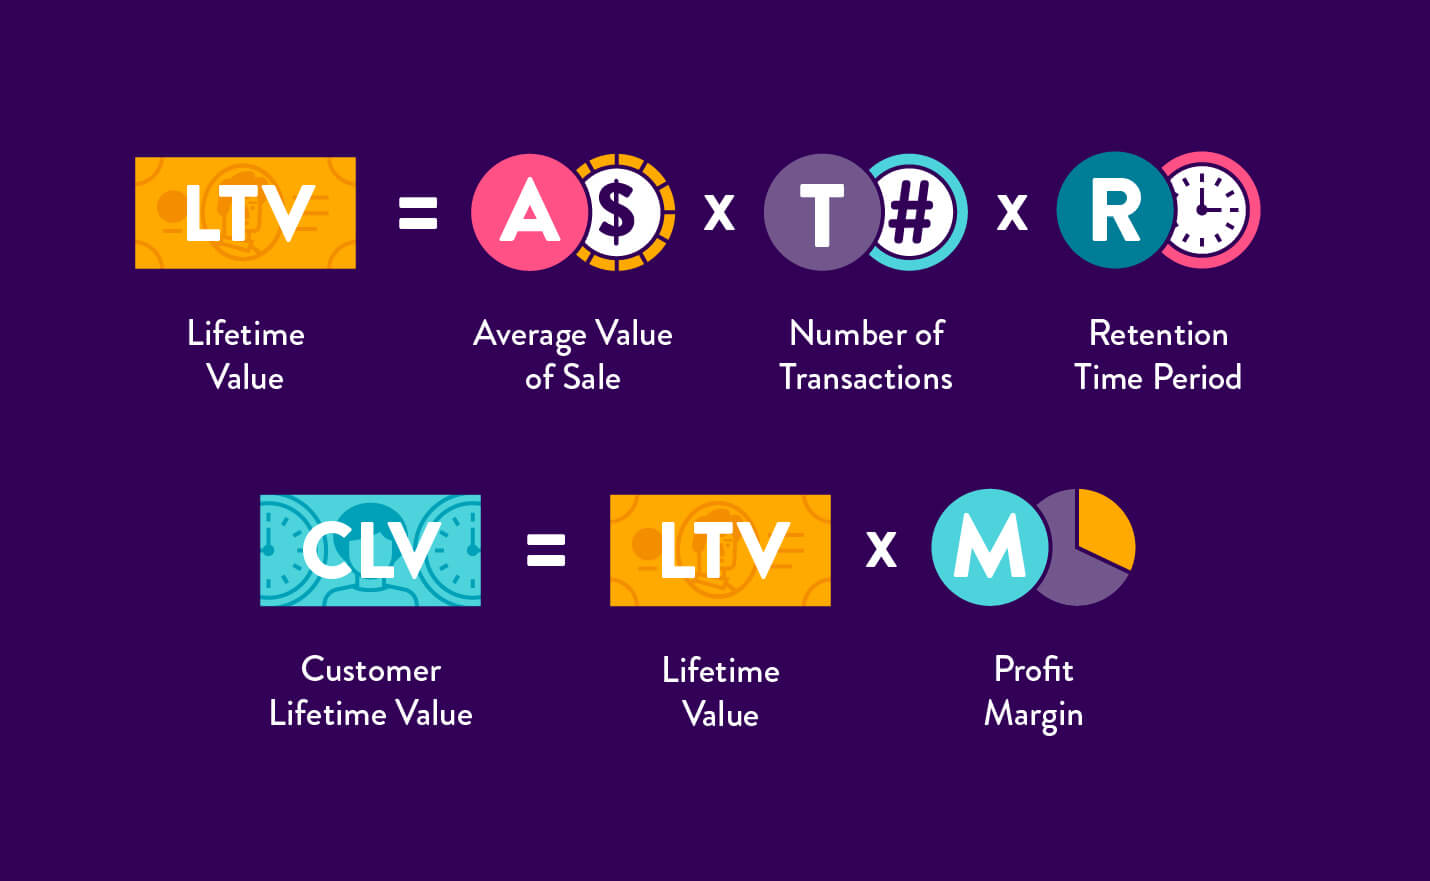

In [69]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 8.3 MB/s 


In [70]:
pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

from sklearn.metrics import mean_absolute_percentage_error

from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.utils import \
    calibration_and_holdout_data, \
    summary_data_from_transaction_data, \
    calculate_alive_path
from lifetimes.plotting import \
    plot_frequency_recency_matrix, \
    plot_probability_alive_matrix, \
    plot_period_transactions, \
    plot_history_alive, \
    plot_cumulative_transactions, \
    plot_calibration_purchases_vs_holdout_purchases, \
    plot_transaction_rate_heterogeneity, \
    plot_dropout_rate_heterogeneity


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.0f}'.format